In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce

date_format = "%m/%d/%Y"

In [261]:
df = pd.read_excel("Mkt Engineering  Analytics - Clustering dataset.xlsx", index_col="Custid")

# I. Business Understanding

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1001 to 11000
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dayswus              10000 non-null  int64  
 1   Age                  10000 non-null  int64  
 2   Education            9997 non-null   object 
 3   Income               9993 non-null   float64
 4   Kidhome              10000 non-null  int64  
 5   Teenhome             10000 non-null  int64  
 6   Freq                 9981 non-null   float64
 7   Recency              10000 non-null  int64  
 8   Monetary             10000 non-null  int64  
 9   LTV                  10000 non-null  int64  
 10  Perdeal              10000 non-null  int64  
 11  Dryred               10000 non-null  int64  
 12  Sweetred             10000 non-null  int64  
 13  Drywh                9970 non-null   float64
 14  Sweetwh              10000 non-null  int64  
 15  Dessert              10000 non-nu

In [263]:
df.describe(include="all").T

count unique           top  freq          mean  \
Dayswus              10000.0    NaN           NaN   NaN       898.102   
Age                  10000.0    NaN           NaN   NaN       47.9273   
Education               9997      7  MasterDegree  4663           NaN   
Income                9993.0    NaN           NaN   NaN  69919.134394   
Kidhome              10000.0    NaN           NaN   NaN        0.4188   
Teenhome             10000.0    NaN           NaN   NaN        0.4698   
Freq                  9981.0    NaN           NaN   NaN     14.602745   
Recency              10000.0    NaN           NaN   NaN       62.4068   
Monetary             10000.0    NaN           NaN   NaN      926.3313   
LTV                  10000.0    NaN           NaN   NaN      208.7715   
Perdeal              10000.0    NaN           NaN   NaN       32.3972   
Dryred               10000.0    NaN           NaN   NaN       50.3827   
Sweetred             10000.0    NaN           NaN   NaN        7.0545   
Drywh                 9970.0    NaN           NaN   NaN     28.525276   
Sweetwh              10000.0    NaN           NaN   NaN        7.0698   
Dessert              10000.0    NaN           NaN   NaN        6.9474   
Exotic               10000.0    NaN           NaN   NaN       16.5466   
WebPurchase          10000.0    NaN           NaN   NaN       42.3762   
WebVisit              9998.0    NaN           NaN   NaN      5.216743   
ExpressedPreference     2467      4             A   646           NaN   
NPS                   2219.0    NaN           NaN   NaN      5.035151   

                              std      min      25%      50%      75%  \
Dayswus                202.492789    550.0   723.75    894.0   1074.0   
Age                     17.302721     18.0     33.0     48.0     63.0   
Education                     NaN      NaN      NaN      NaN      NaN   
Income               27610.471317  10000.0  47684.0  70017.0  92162.0   
Kidhome                  0.493387      0.0      0.0      0.0      1.0   
Teenhome                 0.499112      0.0      0.0      0.0      1.0   
Freq                    11.990234    -36.0      4.0     12.0     24.0   
Recency                 69.874255      0.0     26.0     52.0    78.25   
Monetary             16223.974799      6.0     63.0    383.0   1077.0   
LTV                    293.736577  -3000.0     -2.0     57.0    364.0   
Perdeal                 27.897094      0.0      6.0     25.0     56.0   
Dryred                  23.453815      1.0     32.0     51.0     69.0   
Sweetred                 7.866544      0.0      2.0      4.0     10.0   
Drywh                   12.587525      1.0     19.0     28.0     37.0   
Sweetwh                  8.015083      0.0      2.0      4.0     10.0   
Dessert                  7.879546      0.0      2.0      4.0      9.0   
Exotic                  17.247672      0.0      4.0     10.0     23.0   
WebPurchase             18.522062      4.0     28.0     45.0     57.0   
WebVisit                 2.330399      0.0      3.0      6.0      7.0   
ExpressedPreference           NaN      NaN      NaN      NaN      NaN   
NPS                      3.214966      0.0      2.0      5.0      8.0   

                           max  
Dayswus                 1250.0  
Age                       78.0  
Education                  NaN  
Income                140628.0  
Kidhome                    1.0  
Teenhome                   1.0  
Freq                      56.0  
Recency                  549.0  
Monetary             1150000.0  
LTV                     1791.0  
Perdeal                   97.0  
Dryred                    99.0  
Sweetred                  75.0  
Drywh                     74.0  
Sweetwh                   62.0  
Dessert                   77.0  
Exotic                    96.0  
WebPurchase               88.0  
WebVisit                  10.0  
ExpressedPreference        NaN  
NPS                       10.0

# II. Data Understanding

# III. Data Preparation

## Dealing with Outliers

In [264]:
df_prep = df.copy(deep=True)

### Recency, Frequency, Monetary and LTV Outliers

In [265]:
minMon = 0
maxMon = 20000

df_prep = df_prep[df_prep["Monetary"] > minMon]
df_prep = df_prep[df_prep["Monetary"] < maxMon]

In [266]:
minFreq = 0
maxFreq = 50

df_prep = df_prep[df_prep["Freq"] > minFreq]
df_prep = df_prep[df_prep["Freq"] < maxFreq]

In [267]:
minLTV = -100
maxLTV = 1600

df_prep = df_prep[df_prep["LTV"] > minLTV]
df_prep = df_prep[df_prep["LTV"] < maxLTV]

In [268]:
minRecency = 0
maxRecency = 500

df_prep = df_prep[df_prep["Recency"] > minRecency]
df_prep = df_prep[df_prep["Recency"] < maxRecency]

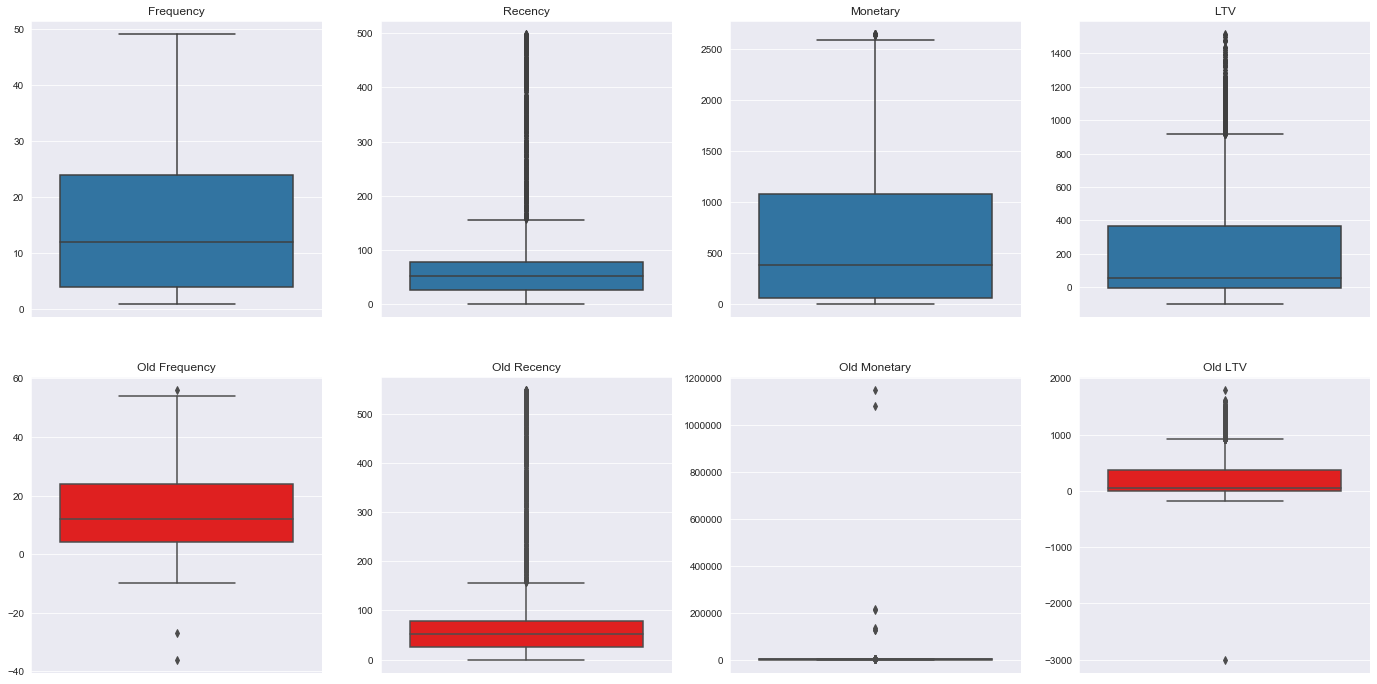

In [269]:
#Dealing with the distribuition of the Purchased habits
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24, 12))

sns.boxplot(data=df_prep, y='Freq', ax=axes[0][0]).set(ylabel=None);
sns.boxplot(data=df_prep, y='Recency', ax=axes[0][1]).set(ylabel=None);
sns.boxplot(data=df_prep, y='Monetary', ax=axes[0][2]).set(ylabel=None);
sns.boxplot(data=df_prep, y='LTV', ax=axes[0][3]).set(ylabel=None);
sns.boxplot(data=df, y='Freq', color="red", ax=axes[1][0]).set(ylabel=None);
sns.boxplot(data=df, y='Recency', color="red", ax=axes[1][1]).set(ylabel=None);
sns.boxplot(data=df, y='Monetary', color="red", ax=axes[1][2]).set(ylabel=None);
sns.boxplot(data=df, y='LTV', color="red", ax=axes[1][3]).set(ylabel=None);

axes[0][0].set(title='Frequency');
axes[0][1].set(title='Recency');
axes[0][2].set(title='Monetary');
axes[0][3].set(title='LTV');
axes[1][0].set(title='Old Frequency');
axes[1][1].set(title='Old Recency');
axes[1][2].set(title='Old Monetary');
axes[1][3].set(title='Old LTV');

plt.show()

## Dealing with NaN

In [270]:
df_prep.isna().sum()

Dayswus                   0
Age                       0
Education                 3
Income                    7
Kidhome                   0
Teenhome                  0
Freq                      0
Recency                   0
Monetary                  0
LTV                       0
Perdeal                   0
Dryred                    0
Sweetred                  0
Drywh                    30
Sweetwh                   0
Dessert                   0
Exotic                    0
WebPurchase               0
WebVisit                  2
ExpressedPreference    7392
NPS                    7646
dtype: int64

In [271]:
# Education
df_prep = df_prep.dropna(axis=0, how='any',subset=["Education"])
# Income
df_prep['Income'] = df_prep.groupby(['Education', 'Age'])['Income'].apply(lambda x: x.fillna(x.median()))
# WebVisits
df_prep['WebVisit'] = df_prep['WebVisit'].fillna(0)

# Drywh Purchase - We need to create a variable that can calculate the percentage of total and then calculate the missing values
# Right now, we are just going to drop the columns
df_prep = df_prep.dropna(axis=0, how='any',subset=["Drywh"])

### Outliers removal

Now let's calculate how many people we lost on the by cutting the outliers

In [272]:
print("Total rows removed: ", df.shape[0] - df_prep.shape[0])
print("Percentage of the dataset ramaining: ", (df_prep.shape[0] / df.shape[0])*100, "%")

Total rows removed:  202
Percentage of the dataset ramaining:  97.98 %


### Weird values

<b>Education:</b> "+", "with", "With"

In [273]:
df_prep = df_prep[df_prep.Education != '"+"']
df_prep = df_prep[df_prep.Education != 'WTH']
df_prep = df_prep[df_prep.Education != 'wth']

In [274]:
# Removing teens and kids to children

#Changing the columns teenhome and kidhome to boolean
#  df["Kidhome"] = np.where(df["Kidhome"] == 0, df["Kidhome"], 1)
#  df["Teenhome"] = np.where(df["Teenhome"] == 0, df["Teenhome"], 1)
#Creating new column to know if the person has kid, teen, both or none
#  df["Children"] = df["Kidhome"] + df["Teenhome"]

#  df.drop(["Kidhome", "Teenhome"], axis=1, inplace=True)

In [275]:
behavior_cols = ["Dayswus", "Age", "Education", "Income", "Kidhome", "Teenhome", "Freq", "Recency", "Monetary", "LTV", "WebPurchase", "WebVisit"]
taste_cols = ["Dayswus", "Age", "Education", "Income", "Kidhome", "Teenhome", "Perdeal", "Dryred", "Sweetred", "Drywh", "Sweetred", "Dessert", "Exotic"]
pref_NPS_cols = ["ExpressedPreference", "NPS"]

In [276]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9794 entries, 1001 to 11000
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dayswus              9794 non-null   int64  
 1   Age                  9794 non-null   int64  
 2   Education            9794 non-null   object 
 3   Income               9794 non-null   float64
 4   Kidhome              9794 non-null   int64  
 5   Teenhome             9794 non-null   int64  
 6   Freq                 9794 non-null   float64
 7   Recency              9794 non-null   int64  
 8   Monetary             9794 non-null   int64  
 9   LTV                  9794 non-null   int64  
 10  Perdeal              9794 non-null   int64  
 11  Dryred               9794 non-null   int64  
 12  Sweetred             9794 non-null   int64  
 13  Drywh                9794 non-null   float64
 14  Sweetwh              9794 non-null   int64  
 15  Dessert              9794 non-null

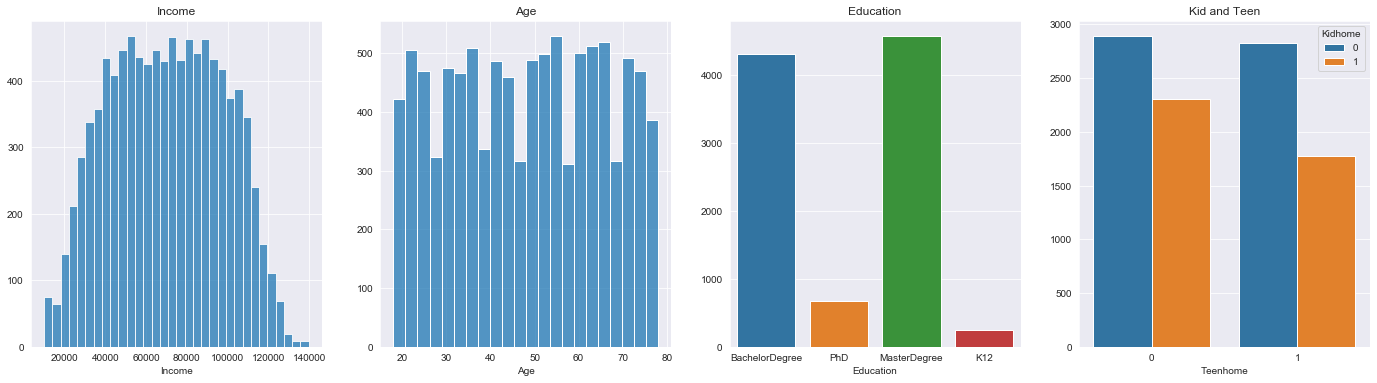

In [277]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (24, 6))

sns.histplot(data=df_prep, x='Income', ax=ax[0]).set(ylabel=None);
sns.histplot(data=df_prep, x='Age', ax=ax[1]).set(ylabel=None);
sns.countplot(data=df_prep, x='Education', ax=ax[2]).set(ylabel=None);
sns.countplot(data=df_prep, x='Teenhome', hue='Kidhome', ax=ax[3]).set(ylabel=None);

ax[0].set(title='Income');
ax[1].set(title='Age');
ax[2].set(title='Education');
ax[3].set(title='Kid and Teen');

plt.show()

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


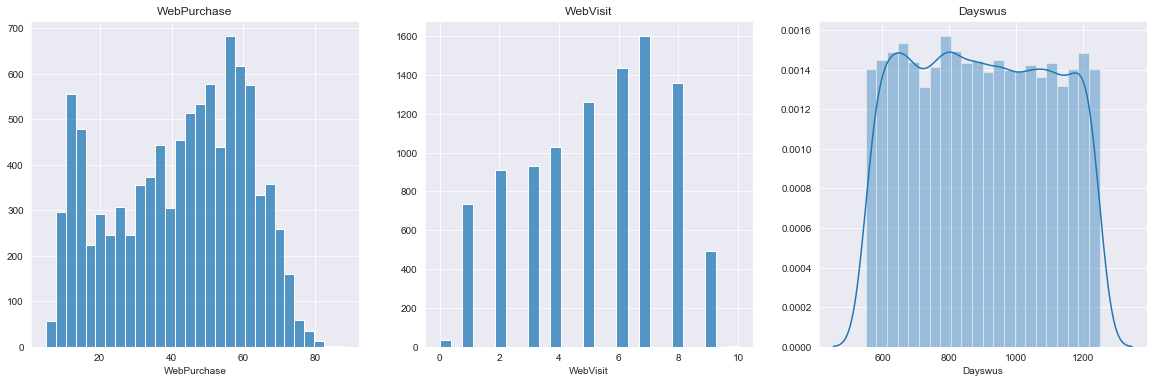

In [278]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.histplot(data=df_prep, x='WebPurchase', ax=ax[0]).set(ylabel=None);
sns.histplot(data=df_prep, x='WebVisit', ax=ax[1]).set(ylabel=None);
sns.distplot(df_prep["Dayswus"], ax=ax[2]).set(ylabel=None);

ax[0].set(title='WebPurchase');
ax[1].set(title='WebVisit');
ax[2].set(title='Dayswus');

plt.show()

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

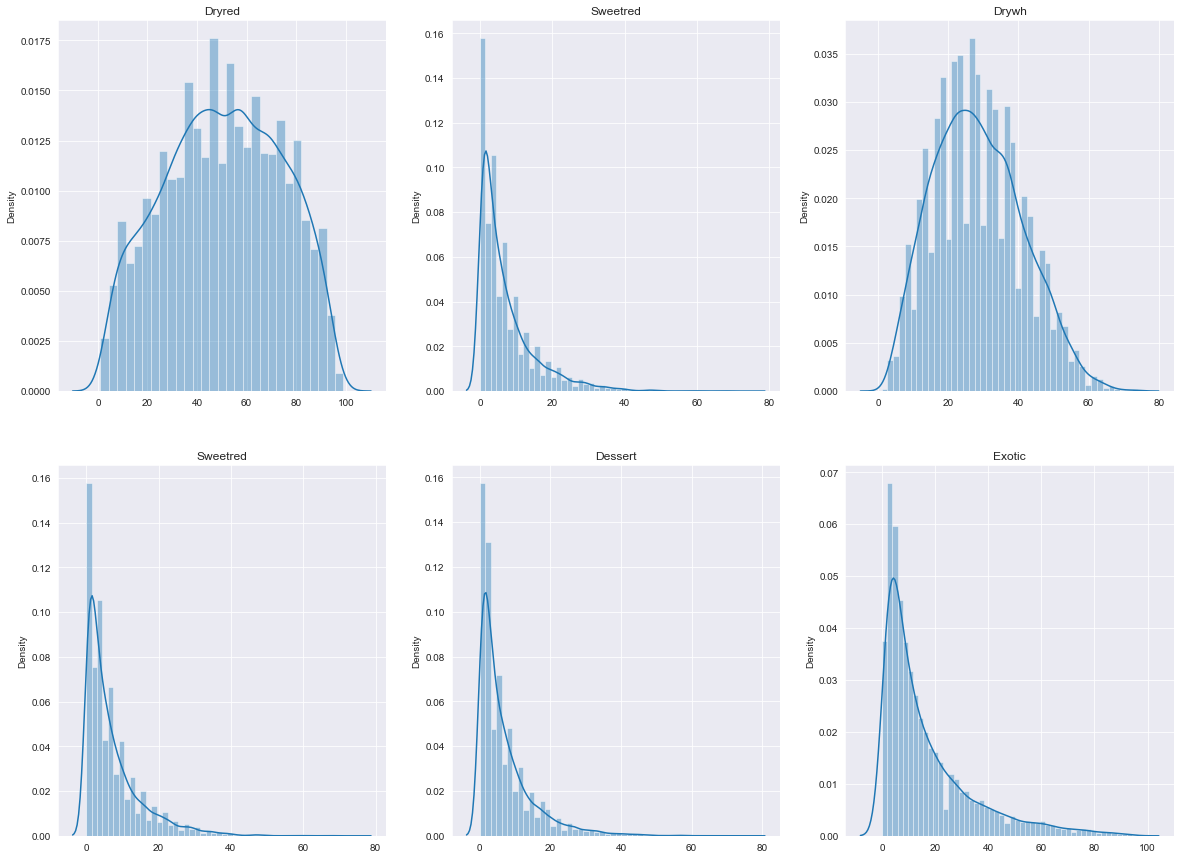

In [279]:
wines = ["Dryred", "Sweetred", "Drywh", "Sweetred", "Dessert", "Exotic"]

# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

sns.distplot(df_prep["Dryred"], ax=axes[0][0]).set(xlabel=None);
sns.distplot(df_prep["Sweetred"], ax=axes[0][1]).set(xlabel=None);
sns.distplot(df_prep["Drywh"], ax=axes[0][2]).set(xlabel=None);
sns.distplot(df_prep["Sweetred"], ax=axes[1][0]).set(xlabel=None);
sns.distplot(df_prep["Dessert"], ax=axes[1][1]).set(xlabel=None);
sns.distplot(df_prep["Exotic"], ax=axes[1][2]).set(xlabel=None);


axes[0][0].set(title='Dryred');
axes[0][1].set(title='Sweetred');
axes[0][2].set(title='Drywh');
axes[1][0].set(title='Sweetred');
axes[1][1].set(title='Dessert');
axes[1][2].set(title='Exotic');

plt.show();

### Creating two DataFrames, one for analysing the behavior and taste

In [280]:
df_behavior = df_prep[behavior_cols]
df_taste = df_prep[taste_cols]

In [281]:
# First, Dummying the Education Column
df_behavior = pd.get_dummies(df_behavior, columns=['Education'])
df_taste = pd.get_dummies(df_taste, columns=['Education'])

In [282]:
df_behavior.describe(include="all").T

count          mean           std      min  \
Dayswus                   9794.0    897.255156    202.209766    550.0   
Age                       9794.0     47.997039     17.292207     18.0   
Income                    9794.0  69995.646569  27566.747049  10000.0   
Kidhome                   9794.0      0.416479      0.493000      0.0   
Teenhome                  9794.0      0.469982      0.499124      0.0   
Freq                      9794.0     14.632428     11.909101      1.0   
Recency                   9794.0     60.659383     62.658169      1.0   
Monetary                  9794.0    622.317031    643.634399      6.0   
LTV                       9794.0    209.377272    289.150320    -98.0   
WebPurchase               9794.0     42.320911     18.515841      5.0   
WebVisit                  9794.0      5.202165      2.332770      0.0   
Education_BachelorDegree  9794.0      0.439146      0.496308      0.0   
Education_K12             9794.0      0.025934      0.158947      0.0   
Education_MasterDegree    9794.0      0.466306      0.498889      0.0   
Education_PhD             9794.0      0.068613      0.252809      0.0   

                               25%      50%      75%       max  
Dayswus                     723.00    893.0   1073.0    1250.0  
Age                          33.00     48.0     63.0      78.0  
Income                    47822.75  70178.0  92230.0  139730.0  
Kidhome                       0.00      0.0      1.0       1.0  
Teenhome                      0.00      0.0      1.0       1.0  
Freq                          4.00     12.0     24.0      49.0  
Recency                      26.00     53.0     78.0     498.0  
Monetary                     64.00    383.0   1077.0    2648.0  
LTV                          -2.00     59.0    365.0    1513.0  
WebPurchase                  27.00     45.0     57.0      88.0  
WebVisit                      3.00      5.0      7.0      10.0  
Education_BachelorDegree      0.00      0.0      1.0       1.0  
Education_K12                 0.00      0.0      0.0       1.0  
Education_MasterDegree        0.00      0.0      1.0       1.0  
Education_PhD                 0.00      0.0      0.0       1.0

In [283]:
df_taste.describe(include="all").T

count          mean           std      min  \
Dayswus                   9794.0    897.255156    202.209766    550.0   
Age                       9794.0     47.997039     17.292207     18.0   
Income                    9794.0  69995.646569  27566.747049  10000.0   
Kidhome                   9794.0      0.416479      0.493000      0.0   
Teenhome                  9794.0      0.469982      0.499124      0.0   
Perdeal                   9794.0     32.223402     27.834666      0.0   
Dryred                    9794.0     50.366245     23.460614      1.0   
Sweetred                  9794.0      7.055851      7.852272      0.0   
Drywh                     9794.0     28.518072     12.603924      1.0   
Sweetred                  9794.0      7.055851      7.852272      0.0   
Dessert                   9794.0      6.950582      7.888105      0.0   
Exotic                    9794.0     16.534817     17.244763      0.0   
Education_BachelorDegree  9794.0      0.439146      0.496308      0.0   
Education_K12             9794.0      0.025934      0.158947      0.0   
Education_MasterDegree    9794.0      0.466306      0.498889      0.0   
Education_PhD             9794.0      0.068613      0.252809      0.0   

                               25%      50%      75%       max  
Dayswus                     723.00    893.0   1073.0    1250.0  
Age                          33.00     48.0     63.0      78.0  
Income                    47822.75  70178.0  92230.0  139730.0  
Kidhome                       0.00      0.0      1.0       1.0  
Teenhome                      0.00      0.0      1.0       1.0  
Perdeal                       6.00     25.0     56.0      96.0  
Dryred                       32.00     51.0     69.0      99.0  
Sweetred                      2.00      4.0     10.0      75.0  
Drywh                        19.00     28.0     37.0      74.0  
Sweetred                      2.00      4.0     10.0      75.0  
Dessert                       2.00      4.0      9.0      77.0  
Exotic                        4.00     10.0     23.0      96.0  
Education_BachelorDegree      0.00      0.0      1.0       1.0  
Education_K12                 0.00      0.0      0.0       1.0  
Education_MasterDegree        0.00      0.0      1.0       1.0  
Education_PhD                 0.00      0.0      0.0       1.0

In [284]:
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Behavior Segmentation

First on the behavior data

In [285]:
behavior_scalled = df_behavior.copy()

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
behavior_scalled = pd.DataFrame(scaler.fit_transform(behavior_scalled), columns=behavior_scalled.columns)

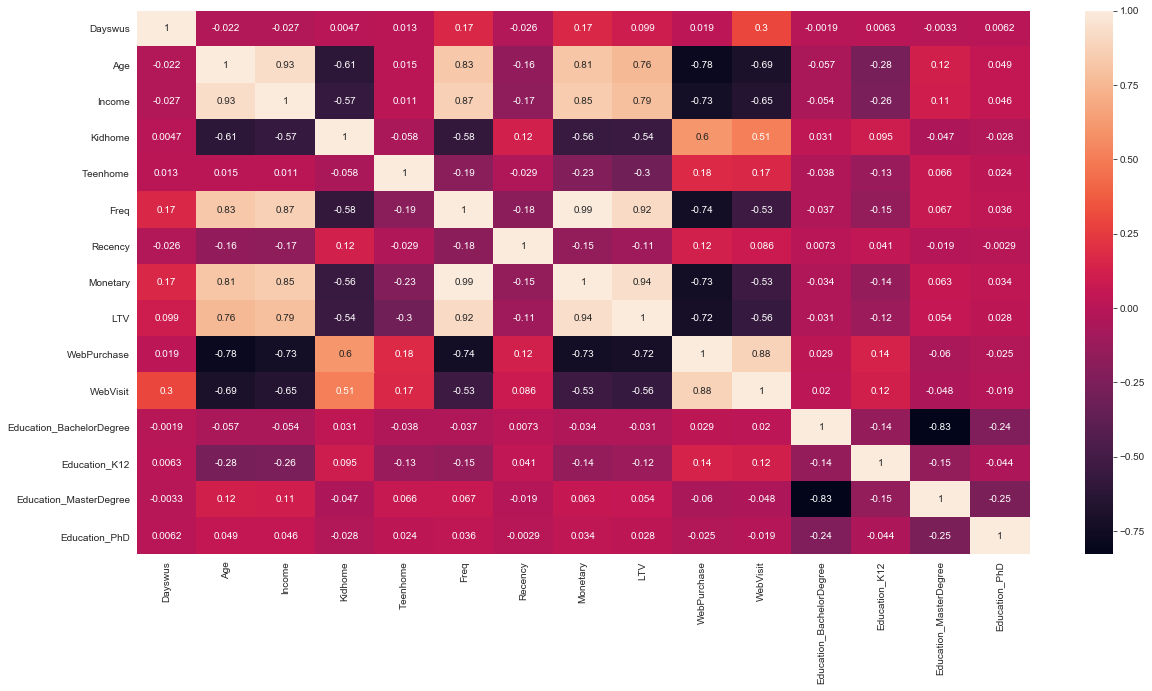

In [286]:
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(behavior_scalled.corr(), annot=True)

### Education

As education didn't have much utility in the corr() and didn't perform well in the model, we will also remove it from the modeling

In [287]:
educ_cols = ["Education_BachelorDegree", "Education_K12", "Education_MasterDegree", "Education_PhD"]

behavior_scalled = behavior_scalled.drop(educ_cols, axis=1)

behavior_scalled.describe(include="all")

Dayswus          Age       Income      Kidhome     Teenhome  \
count  9794.000000  9794.000000  9794.000000  9794.000000  9794.000000   
mean      0.496079     0.499951     0.462465     0.416479     0.469982   
std       0.288871     0.288203     0.212493     0.493000     0.499124   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.247143     0.250000     0.291550     0.000000     0.000000   
50%       0.490000     0.500000     0.463871     0.000000     0.000000   
75%       0.747143     0.750000     0.633855     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              Freq      Recency     Monetary          LTV  WebPurchase  \
count  9794.000000  9794.000000  9794.000000  9794.000000  9794.000000   
mean      0.284009     0.120039     0.233277     0.190799     0.449650   
std       0.248106     0.126073     0.243616     0.179485     0.223082   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.062500     0.050302     0.021953     0.059590     0.265060   
50%       0.229167     0.104628     0.142695     0.097455     0.481928   
75%       0.479167     0.154930     0.405375     0.287399     0.626506   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          WebVisit  
count  9794.000000  
mean      0.520216  
std       0.233277  
min       0.000000  
25%       0.300000  
50%       0.500000  
75%       0.700000  
max       1.000000

### Modeling

In [288]:
#Building the Model

#Number of Cluester to Test
nr_cluster = 20
sse = []
sil = []

for k in range(1, nr_cluster+1):
    model = KMeans(n_clusters= k, init='k-means++', max_iter=2000, n_init=10, random_state=0)
    model.fit(behavior_scalled)
    sse.append(model.inertia_)

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, nr_cluster+1):
  model = KMeans(n_clusters = k, init='k-means++', max_iter=2000, n_init=10, random_state=0)
  model.fit(behavior_scalled)
  labels = model.labels_
  sil.append(silhouette_score(behavior_scalled, labels, metric = 'euclidean'))

#Creating a Table with the Some of the Squared Error
df_error = pd.DataFrame({'k': range(1, nr_cluster+1), 'error': sse})
df_silh = pd.DataFrame({'k': range(2, nr_cluster+1), 'error': sil})

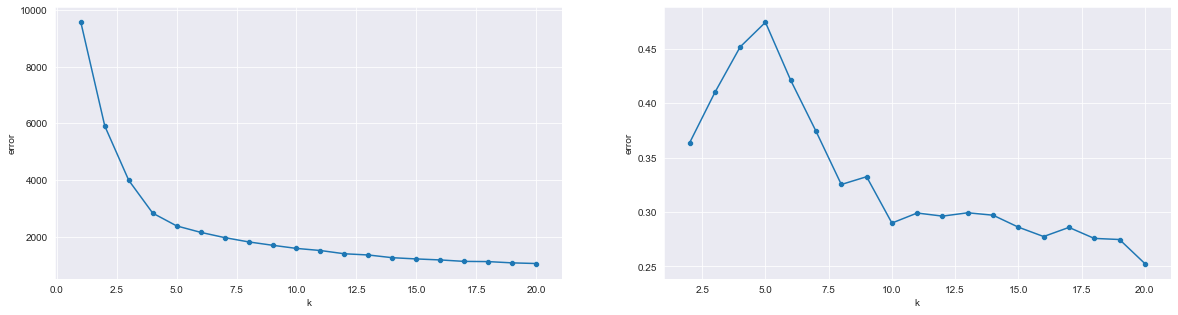

In [289]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.lineplot(data = df_error, x = 'k', y = 'error', ax = ax[0])
sns.scatterplot(data=df_error, x='k', y='error', ax = ax[0])
sns.lineplot(data = df_silh, x = 'k', y = 'error', ax = ax[1])
sns.scatterplot(data=df_silh, x='k', y='error', ax = ax[1])
plt.show()

In [290]:
#Evaluating the Model
k = 5

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=2000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(behavior_scalled)

# Count observations per cluster
df_behavior.groupby(pred_y).size()

0    2279
1    1777
2    2251
3    2824
4     663
dtype: int64

In [291]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = df_behavior.columns
clustersMeanDF = pd.DataFrame(df_behavior[top_features].groupby(pred_y).mean(),columns=top_features)
clustersMeanDF.transpose()

0             1             2  \
Dayswus                      890.364195    899.202589    896.823190   
Age                           69.647214     41.363534     30.063972   
Income                    102744.109258  60034.648284  43312.491559   
Kidhome                        0.022378      1.000000      1.000000   
Teenhome                       0.000878      1.000000      0.000000   
Freq                          30.501536      6.907147      5.492226   
Recency                       50.600263     67.081035     72.318525   
Monetary                    1502.158403    217.649409    151.962683   
LTV                          620.085564      7.524479     21.798756   
WebPurchase                   17.724879     52.855374     58.047979   
WebVisit                       2.426064      6.308948      6.881830   
Education_BachelorDegree       0.426503      0.436128      0.475789   
Education_K12                  0.000000      0.007878      0.073301   
Education_MasterDegree         0.496709      0.487901      0.397601   
Education_PhD                  0.076788      0.068092      0.053310   

                                     3             4  
Dayswus                     900.567989    903.078431  
Age                          52.595609     32.654600  
Income                    76749.248584  45951.238311  
Kidhome                       0.000000      0.000000  
Teenhome                      1.000000      0.000000  
Freq                         15.461048      8.292609  
Recency                      53.540722     68.761689  
Monetary                    623.261686    275.463047  
LTV                         183.751771     84.631976  
WebPurchase                  41.419972     49.073906  
WebVisit                      5.196176      6.101056  
Education_BachelorDegree      0.408640      0.496229  
Education_K12                 0.002479      0.102564  
Education_MasterDegree        0.509561      0.352941  
Education_PhD                 0.079320      0.048265

In [292]:
#Creating the Column for Cluster Group and SumPrem for all the Premium
df_behavior['Cluster_KMean'] = kmeans.labels_

In [293]:
#Calculating the centroid of each cluster
centroids_kmeans = df_behavior.groupby('Cluster_KMean').mean()

In [294]:
cluster_names = {
    0: 'Old and Profitable',
    1: 'Kids and Teens @ Home',
    2: 'Kids Parents',
    3: 'Teen Parents',
    4: 'Young of Sould'
}

df_behavior['Cluster_KMean'] = df_behavior['Cluster_KMean'].replace(cluster_names)

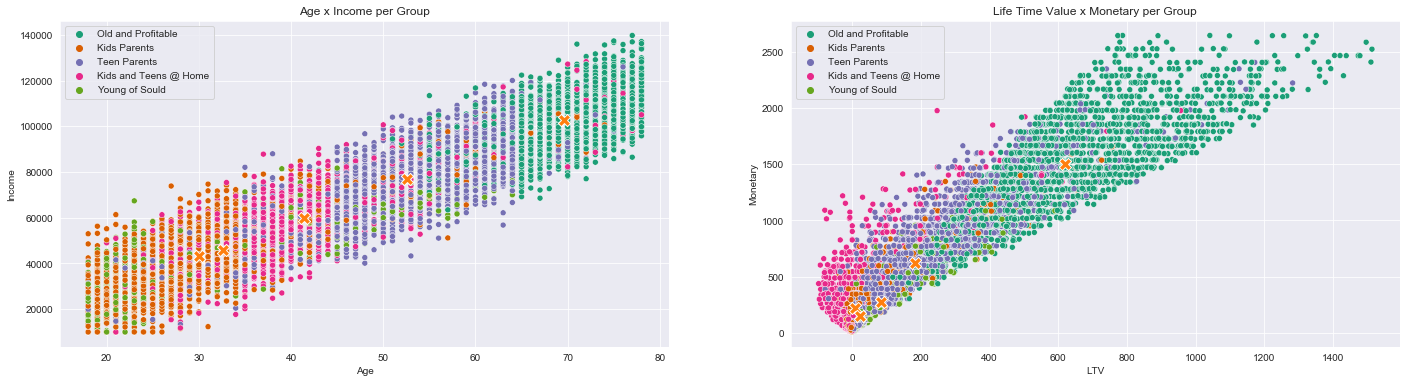

In [295]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 6))

sns.scatterplot(data=df_behavior, x="Age", y = "Income", hue='Cluster_KMean', palette="Dark2", ax=ax[0])
sns.scatterplot(data=centroids_kmeans, x="Age", y = "Income", marker = 'X', s = 150, ax=ax[0])
sns.scatterplot(data=df_behavior, x="LTV", y = "Monetary", hue='Cluster_KMean', palette="Dark2", ax=ax[1])
sns.scatterplot(data=centroids_kmeans, x="LTV", y = "Monetary", marker = 'X', s = 150, ax=ax[1])

ax[0].set(title='Age x Income per Group');
ax[1].set(title='Life Time Value x Monetary per Group');

plt.show()

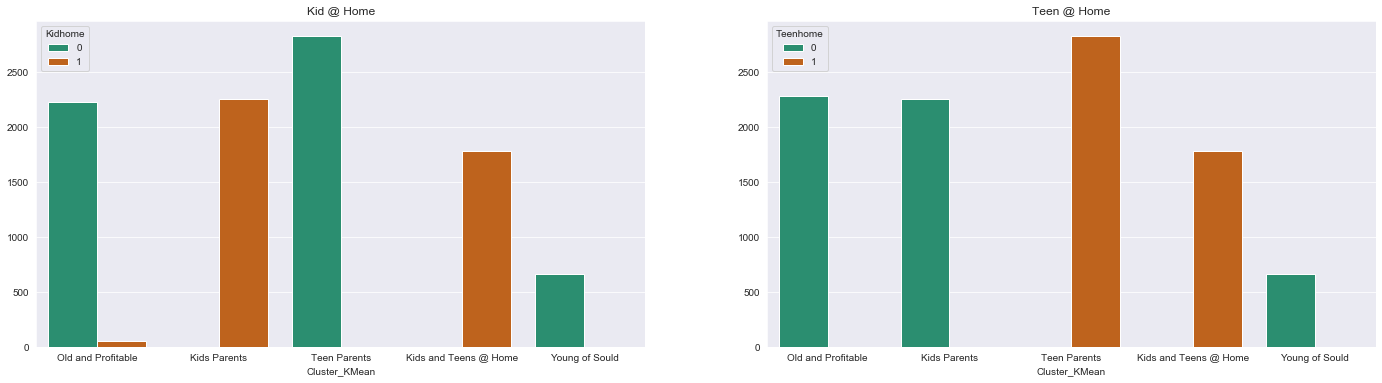

In [296]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 6))

sns.countplot(data=df_behavior, x='Cluster_KMean', hue='Kidhome', palette='Dark2', ax=ax[0]).set(ylabel=None);
sns.countplot(data=df_behavior, x='Cluster_KMean', hue='Teenhome', palette='Dark2', ax=ax[1]).set(ylabel=None);

ax[0].set(title='Kid @ Home');
ax[1].set(title='Teen @ Home');

plt.show()